In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Data
df = pd.read_excel('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/dataforknn.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.rename(columns={'Unnamed: 0' : 'Gender', 'Unnamed: 1' : 'Length', 'Unnamed: 2' : 'Diameter', 'Unnamed: 3' : 'Height', 'Unnamed: 4' : 'Whole weight', 'Unnamed: 5' : 'Shucked weight'}, inplace=True)

In [7]:
df.rename(columns={'Unnamed: 6' : 'Viscera weight', 'Unnamed: 7' : 'Shell weight', 'Unnamed: 8' : 'Rings'}, inplace=True)

In [8]:
df.drop(columns={'Whole weight'}, inplace= True)

In [9]:
df

,Gender,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,0.5310,0.2610,0.2960,10


In [10]:
df.corr()

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.774972,0.798319,0.817338,0.557467
Shucked weight,0.897914,0.893162,0.774972,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.420884,0.503819,0.627574,1.000000


In [11]:
df.corr().sort_values(by = ['Rings'])

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
Shucked weight,0.897914,0.893162,0.774972,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.931961,1.000000,0.907656,0.503819
Length,1.000000,0.986812,0.827554,0.897914,0.903018,0.897706,0.556720
Height,0.827554,0.833684,1.000000,0.774972,0.798319,0.817338,0.557467
Diameter,0.986812,1.000000,0.833684,0.893162,0.899724,0.905330,0.574660
Shell weight,0.897706,0.905330,0.817338,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.420884,0.503819,0.627574,1.000000


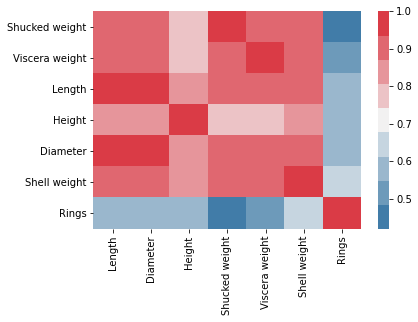

In [12]:
sns.heatmap(df.corr().sort_values(by = ['Rings']), cmap = sns.diverging_palette(240, 10, n=9));

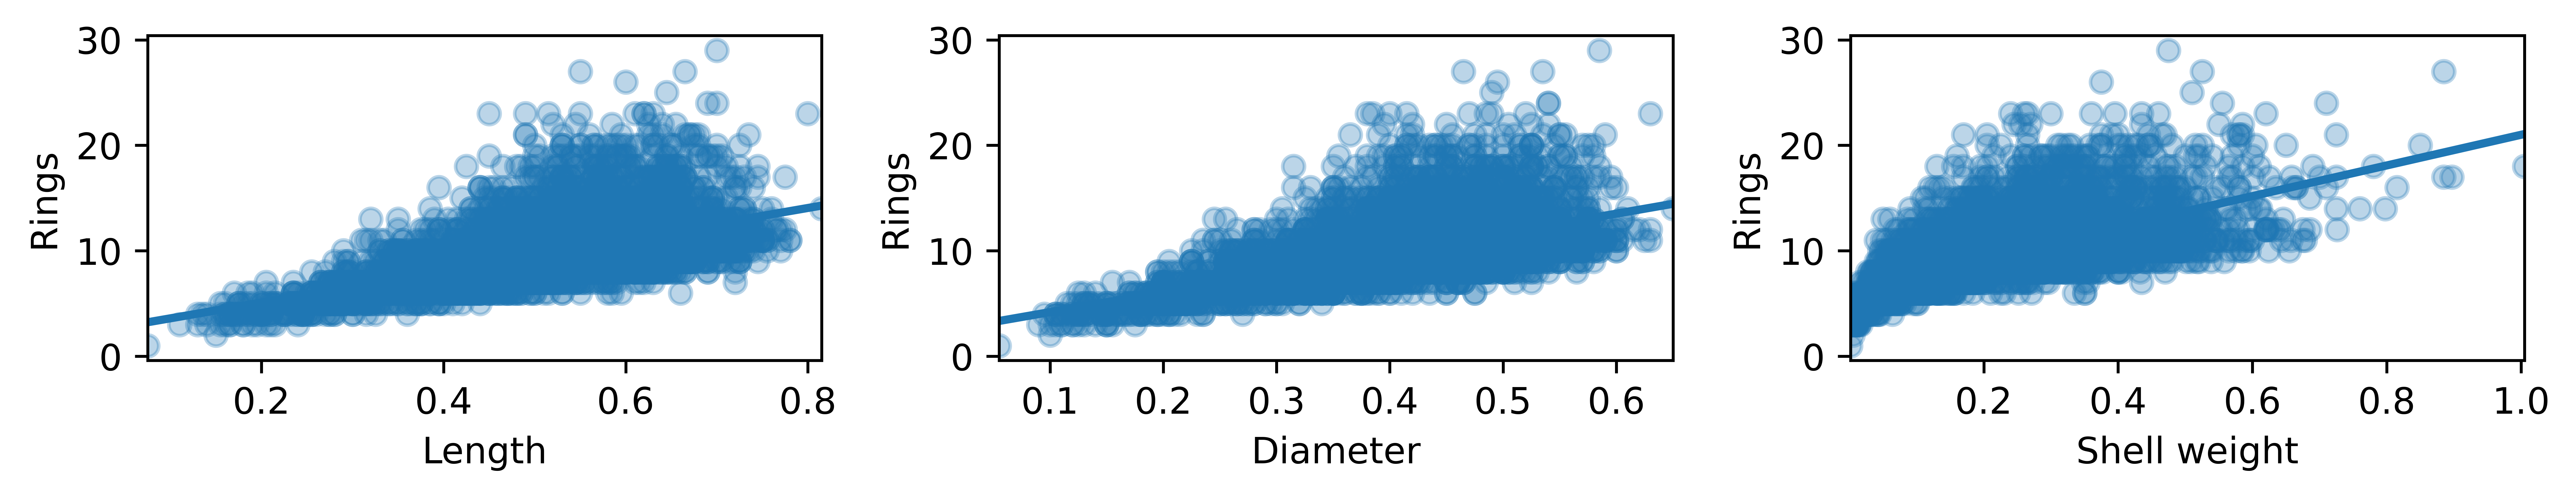

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=1000)
sns.regplot(x='Length', y='Rings', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='Diameter', y='Rings', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='Shell weight', y='Rings', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

Rings +1.5 are equal to Age

# Classifier

In [14]:
X = df.loc[:, ['Length',
           'Diameter',
           'Height',
           'Viscera weight',
           'Shell weight']]

In [15]:
X.shape

(4177, 5)

In [16]:
y = df.loc[:, 'Gender'].values

In [17]:
y.shape

(4177,)

In [18]:
#instant
scaler = StandardScaler()
#fit
scaler.fit(X)
#transform X
X = scaler.transform(X)

In [19]:
# instant
knn = KNeighborsClassifier(n_neighbors=1)


In [20]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [21]:
#fit
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [22]:
predictions = knn.predict(X)

In [23]:
predictions

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

In [24]:
score = knn.score(X, y)
print(score)

0.9997605937275557


#Regression 

In [25]:
Xx = df.loc[:, ['Length',
           'Diameter',
           'Height',
           'Viscera weight',
           'Shell weight']]

In [26]:
Xx.shape

(4177, 5)

In [27]:
yy = df.loc[:, 'Rings'].values

In [28]:
yy.shape

(4177,)

In [29]:
#instant
scaler = StandardScaler()
#fit
scaler.fit(Xx)
#transform Xx
Xx = scaler.transform(Xx)

In [30]:
# instant
knn1 = KNeighborsRegressor(n_neighbors=2)

In [31]:
print(knn1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')


In [32]:
knn1.fit(Xx, yy)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [33]:
predictions1 = knn1.predict(Xx)

In [34]:
predictions1

array([11. ,  9.5,  9.5, ..., 11. ,  9.5, 12. ])

In [35]:
score = knn1.score(Xx, yy)
print(score)

0.7784816790738089


# Questions

1. Could you have used linear regression and KNN regression to solve the regression problem? 

a. Yes
2. Could you have used linear regression for the classification problem?

b. No, the predicted value is continuous, not probabilistic. sensitive to imbalance data when using linear regression for classification

#############################################

# Train test split Exercise

In [36]:
X1 = df.loc[:, ['Length',
           'Diameter',
           'Height',
           'Viscera weight',
           'Shell weight']]

In [37]:
X1.shape

(4177, 5)

In [38]:
y1 = df.loc[:, 'Rings'].values

In [39]:
y1.shape

(4177,)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=3)

In [41]:
# Standardize Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
knn2 = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [76]:
# Looking at some hyperparameters that seem tunable
print(knn2)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [77]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
predictions = knn2.predict(X_train)

In [79]:
predictions


array([ 8,  7,  9, ..., 11,  8, 11])

In [80]:
preds_test = knn2.predict(X_test)
preds_test

array([10, 11, 13, ...,  8,  8, 14])

In [81]:
knn2.score(X_train, y_train)

0.4281609195402299

In [82]:
# calculate classification accuracy
score = knn2.score(X_test, y_test)
score


0.21052631578947367

# Non-Train data test

In [84]:
X2 = df.loc[:, ['Length',
           'Diameter',
           'Height',
           'Viscera weight',
           'Shell weight']]

In [85]:
X2.shape

(4177, 5)

In [86]:
y2 = df.loc[:, 'Rings'].values

In [87]:
y2.shape

(4177,)

In [88]:
# Standardize Data
#instant
scaler = StandardScaler()
#fit
scaler.fit(X2)
#transform Xx
X2 = scaler.transform(X2)

In [90]:
knn3 = KNeighborsRegressor(n_neighbors=2)

In [91]:
print(knn3)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')


In [92]:
knn3.fit(X2, y2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [93]:
predictions1 = knn3.predict(X2)

In [94]:
predictions1

array([11. ,  9.5,  9.5, ..., 11. ,  9.5, 12. ])

In [95]:
score = knn3.score(X2, y2)
print(score)

0.7784816790738089
